In [1]:
import cv2
import numpy as np


In [2]:
vid = cv2.VideoCapture('img/lanes.mp4')

In [14]:
while True:
    ret, frame = vid.read()
    
    
    if not ret:
        vid = cv2.VideoCapture('img/lanes.mp4')
        continue
        
    denoised_frame = cv2.GaussianBlur(frame, (5, 5), 0)
    
    hsv_denoised_frame = cv2.cvtColor(denoised_frame, cv2.COLOR_BGR2HSV)
    cv2.imshow('hsv', hsv_denoised_frame)

    min_yellow = np.array([18, 94, 140]) 
    max_yellow = np.array([48, 255, 255]) 
    
    #HSV
    
    mask = cv2.inRange(hsv_denoised_frame, min_yellow, max_yellow)
    
    canny_denoised_frame= cv2.Canny(mask, 100, 200)
    
    
    lines = cv2.HoughLinesP(canny_denoised_frame, 1, np.pi/180, 50)
    
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(denoised_frame, (x1, y1), (x2, y2), (0, 255, 0), 6)
    
    
    
    cv2.imshow('lanes', denoised_frame)
    
    key = cv2.waitKey(1)
    if key == ord('q'):
        break
        

vid.release()
cv2.destroyAllWindows()
    
    

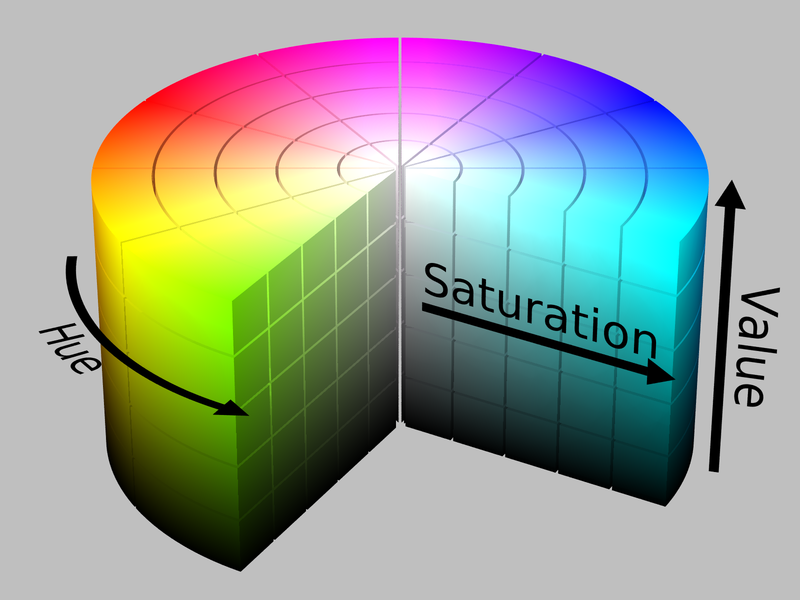